<a href="https://colab.research.google.com/github/steveola/niya_ml_data/blob/main/Module_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loaded Successfully!
  Student_ID  Hours_Studied  Previous_Grade  Attendance  Extra_Activities  \
0       S001           12.5              75          85                 2   
1       S002            5.0              60          45                 0   
2       S003           18.0              82          92                 3   
3       S004            8.5              68          78                 1   
4       S005           15.0              88          95                 2   

   Pass  
0     1  
1     0  
2     1  
3     0  
4     1  
Features (X):
   Hours_Studied  Previous_Grade
0           12.5              75
1            5.0              60
2           18.0              82
3            8.5              68
4           15.0              88

Labels (y):
0    1
1    0
2    1
3    0
4    1
Name: Pass, dtype: int64
Training set size: 20 students
Testing set size: 5 students
Model training complete!
Predictions for the test set:
[1 1 1 1 0]
Model Accuracy: 1.00 (100%)

Confusion 

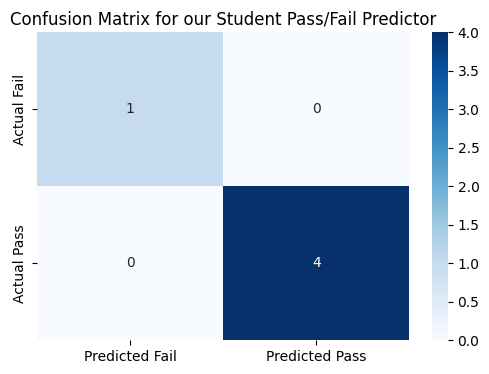

Improved Model Accuracy: 1.00
Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

Model compiled and ready for training!
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4500 - loss: 0.6261 - val_accuracy: 0.8000 - val_loss: 0.6150
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4500 - loss: 0.6242 - val_accuracy: 0.8000 - val_loss: 0.6131
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4500 - loss: 0.6224 - val_accuracy: 0.8000 - val_loss: 0.6114
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.4500 - loss: 0.6205 - val_accuracy: 0.8000 - val_loss: 0.6097
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4500 - loss: 0.6187 - val_accuracy: 0.8000 - val_loss: 0.6080
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4500 - loss: 0.6168 - val_accuracy: 0.8000 - val_loss: 0.6064
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4500 - loss: 0.6150 - val_accuracy: 0.8000 - val_loss: 0.6047
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4500 - loss: 0.613

In [3]:
# Import our essential toolkits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load our dataset
df = pd.read_csv('student_data.csv')
print("Data Loaded Successfully!")
print(df.head())

# X is our Feature Matrix (everything we use to make a prediction)
X = df[['Hours_Studied', 'Previous_Grade']]
# y is our Label Vector (the thing we want to predict)
y = df['Pass']
print("Features (X):")
print(X.head())
print("\nLabels (y):")
print(y.head())

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} students")
print(f"Testing set size: {X_test.shape[0]} students")

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
# TRAIN THE MODEL! This is the magic line.
model.fit(X_train, y_train)
print("Model training complete!")


# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)
print("Predictions for the test set:")
print(y_pred)


# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f} ({accuracy*100:.0f}%)")
# Create a Confusion Matrix to see WHERE we went wrong
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# Let's make a visual heatmap of the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted Fail', 'Predicted Pass'],
yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix for our Student Pass/Fail Predictor')
plt.show()

# Let's try a less complex tree
better_model = DecisionTreeClassifier(max_depth=3, random_state=42)
better_model.fit(X_train, y_train)
better_pred = better_model.predict(X_test)
print(f"Improved Model Accuracy: {accuracy_score(y_test, better_pred):.2f}")


# Step 1: Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Step 2: Load and Prepare the Data (using our preprocessed student data)
# Let's assume X contains ['Hours_Studied', 'Previous_Grade'] and y is 'Pass' (1 or 0)
X = df[['Hours_Studied', 'Previous_Grade']].values
y = df['Pass'].values
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# It's CRUCIAL to scale data for neural networks!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Neural Network Model
model = keras.Sequential([
# Input Layer: 2 features, so 2 inputs. Keras figures this out automatically.
# First Hidden Layer: 8 neurons, ReLU activation.
keras.layers.Dense(8, activation='relu', input_shape=(2,)),
# Second Hidden Layer: 4 neurons, ReLU activation.
keras.layers.Dense(4, activation='relu'),
# Output Layer: 1 neuron (for binary classification), Sigmoid activation.
keras.layers.Dense(1, activation='sigmoid')
])
# Let's look at our creation!
print("Model Architecture:")
model.summary()

# Step 4: Compile the Model (Configure the learning process)
model.compile(optimizer='adam', # A powerful and popular optimizer
loss='binary_crossentropy', # The loss function for binary classification
metrics=['accuracy']) # What to monitor during training
print("Model compiled and ready for training!")
"The moment of truth... let's train it!"


# Step 5: Train the Model (The "Fitting" process)
# Number of passes through the training data
# Check performance on test set after each epoch
history = model.fit(X_train_scaled, y_train,epochs=50,
validation_data=(X_test_scaled, y_test), verbose=1) # Shows a progress bar
print("Training complete!")

# Step 6: Evaluate the Final Model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
# Step 7: Make a Prediction
new_student = np.array([[12, 80]]) # A student who studied 12 hours with an 80 previousm grade
new_student_scaled = scaler.transform(new_student)
prediction_prob = model.predict(new_student_scaled)
print(f"Probability of passing: {prediction_prob[0][0]:.4f}")



